## Determination of the far field diffraction pattern from a rectangular aperture (Xdir)

### by Kevin Javier Zvonarek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq

### E(x,0)

Electric field amplitude captured 0 mm from the slit is approximated by an artificial box function.

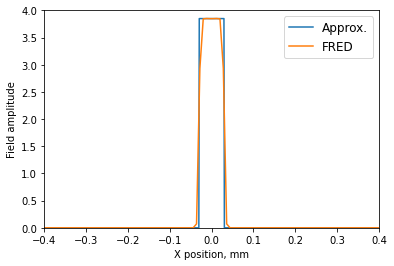

In [2]:
plt.figure(0)
data=np.loadtxt('Ex0fieldamplitude.txt')
y = data[:,0]
Ex0fieldamplitude = data[:,1]
x = np.linspace(-1000, 1000, num = int(2e6))
field = np.zeros(x.size) 
field[np.logical_and(x > -0.03, x <= 0.03)] = 3.8487616549999997
plt.plot(x, field, '-',label='Approx.')
plt.plot(y,Ex0fieldamplitude,label='FRED')
plt.xlabel(r'X position, mm')
plt.ylabel(r'Field amplitude')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='best')
plt.ylim(0,4)
plt.xlim(-.40,.40)
plt.show()

Enlarged view to demonstrate oscillatory behavior on the plateau feature of the box function. Where the blue and orange lines represent the aritifical box function and FRED's output, respectively.

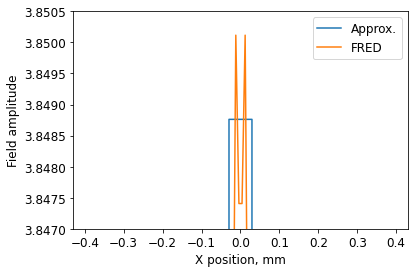

In [3]:
plt.plot(x, field, '-',label='Approx.')
plt.plot(y,Ex0fieldamplitude,label='FRED')
plt.xlabel(r'X position, mm')
plt.ylabel(r'Field amplitude')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='best')
plt.ylim((3.847, 3.8505))
plt.xlim((-.43,.43))
plt.show()

### FT: E(x,0) -> E(kx)

Need to shift the input field so that the point corresponding to x=0 lies in the first element of the array. Also, need to multiply the fft results by the spacing, dy, to obtain the correct scaling/units.

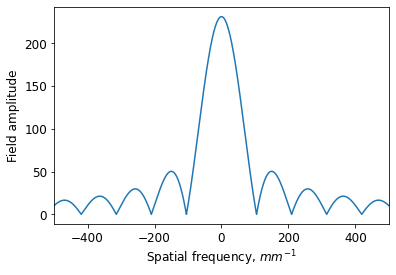

In [4]:
dx = x[1]-x[0] # Spatial sampling period, mm
fS = 1/dx      # Spatial sampling frequency, units are inverse mm
f  = fftshift(fftfreq(field.size)*fS*2*np.pi) #wavenumber (kx) used in subsequent phase factor
Ek = fftshift(fft(field))
plt.plot(f,abs(Ek),'-')
plt.xlim((-500, 500))
plt.xlabel(r'Spatial frequency, $mm^{-1}$')
plt.ylabel(r'Field amplitude')
plt.show()

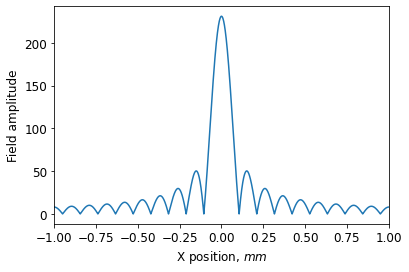

In [7]:
w0 = 2*np.pi*(1/wavelength)
dx = x[1]-x[0] # Spatial sampling period, mm
fS = 1/dx      # Spatial sampling frequency, units are inverse mm
f  = fftshift(fftfreq(field.size)*fS*2*np.pi)
Ek = fftshift(fft(field))
plt.plot(f*10/w0,abs(Ek),'-')
plt.xlim((-1, 1))
plt.xlabel(r'X position, $mm$')
plt.ylabel(r'Field amplitude')
plt.show()

### iFT: E(kx)exp(-ikz) -> E(x,50)

First intensity minima occurs at 0.5275 mm


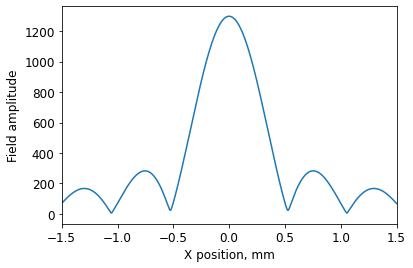

In [6]:
plt.figure(25)
z = 50 #Prop. distance in z-direction (mm)
wavelength = 6.328e-4 #632.8 nm to mm
WC2 = (2*np.pi*(1/wavelength))**2
Kx2 = f**2
Kz = np.sqrt(WC2 - Kx2)
Ex50 = ifft(ifftshift(Ek*np.exp((-1j)*z*Kz)))*fS
plt.plot(x,abs(Ex50))
plt.xlim(-1.5,1.5)
plt.xlabel(r'X position, mm')
plt.ylabel(r'Field amplitude')
Ex5 = abs(Ex50)
e = Ex5[np.logical_and(x > -0.56, x <= -0.49)];
m = round(float(abs(x[Ex5==min(e)])),4);
print('First intensity minima occurs at', m,"mm")
plt.show()

### Output from FRED: E(x,50) field amplitude

First intensity minima occurs at 0.524 mm


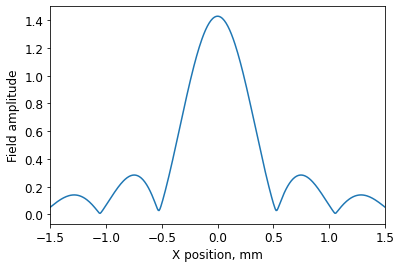

In [8]:
data1 = np.loadtxt('Ex50fieldamplitude.txt')
x1 = data1[:,0];
Ex50energy = data1[:,1];
plt.plot(x1,Ex50energy)
plt.xlabel(r'X position, mm')
plt.ylabel(r'Field amplitude')
plt.xlim(-1.5,1.5)
e = Ex50energy[np.logical_and(x1 > -0.55, x1 <= -0.499)];
m = round(float(abs(x1[Ex50energy==min(e)])),4);
print('First intensity minima occurs at', m,"mm")
plt.show()

### Comparison of FRED and Analytical Solution

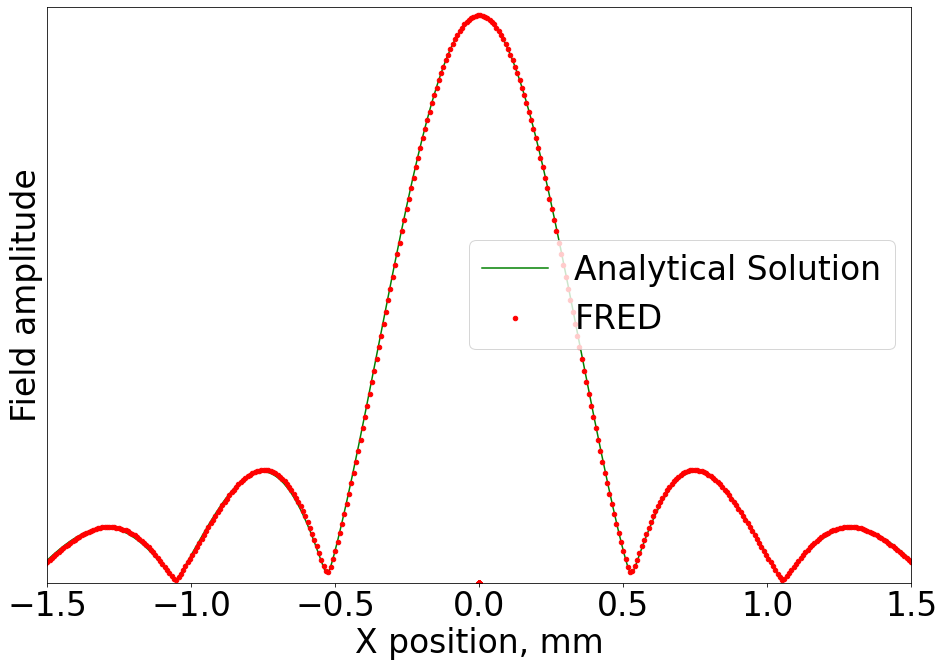

In [12]:
mF = abs(Ex50/910)
Middle = mF[np.logical_and(x > -0.525, x <= 0.525)]
xMiddle = x[np.logical_and(x > -0.525, x <= 0.525)]
lrF = abs(Ex50/1010)
Left = lrF[np.logical_and(x > -1.055, x <= -0.525)]
xLeft = x[np.logical_and(x > -1.055, x <= -0.525)]
Right = lrF[np.logical_and(x > 0.525, x <= 1.055)]
xRight = x[np.logical_and(x > 0.525, x <= 1.055)]
LRF = abs(Ex50/1210)
Leftall = LRF[x <= -1.055]
xLeftall = x[x <= -1.055]
Rightall = LRF[x > 1.055]
xRightall = x[x > 1.055]
fig1 = plt.figure(10)
ax = fig1.add_axes([0,0,2,2])
ax.plot(xLeftall,Leftall,'g-')
ax.plot(xLeft,Left,'g-')
ax.plot(xMiddle,Middle,'g-',label="Analytical Solution")
ax.plot(xRight,Right,'g-')
ax.plot(xRightall,Rightall,'g-')
ax.plot(fullx1,fullEx50energy,"r.",markersize = 9, label="FRED")
ax.set_xlabel(r'X position, mm')
ax.set_ylabel(r'Field amplitude')
ax.axis([-1.5, 1.5, 0.0, 1.45])
plt.rcParams.update({'font.size': 33})
ax.legend(loc='best')
ax.set_yticks([])
ax.set_yticklabels([])
fig1.savefig("Xposition50mm.pdf", bbox_inches='tight')
plt.show()

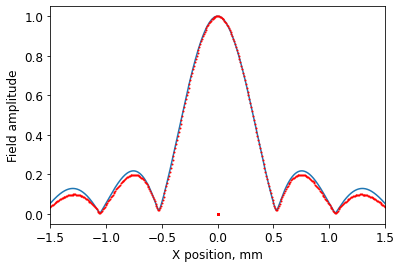

In [10]:
pad = np.zeros(999750)
rightx1 = np.hstack((x1,pad))
fullx1 = np.hstack((pad,rightx1))
rightEx50energy = np.hstack((Ex50energy,pad))
fullEx50energy = np.hstack((pad,rightEx50energy))
plt.plot(x,abs(Ex50)/(max(abs(Ex50))))
plt.plot(fullx1,fullEx50energy/(max(abs(fullEx50energy))),"r.",markersize=2)
plt.xlim(-1.5,1.5)
plt.xlabel(r'X position, mm')
plt.ylabel(r'Field amplitude')
plt.show()